<a href="https://colab.research.google.com/github/LordAguaKate/Practica_DATA_SCIENCE/blob/main/IA_Aumentada_Prevision_Atrasos_Vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

datos = pd.read_csv("flights.csv")


In [2]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [5]:
datos.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


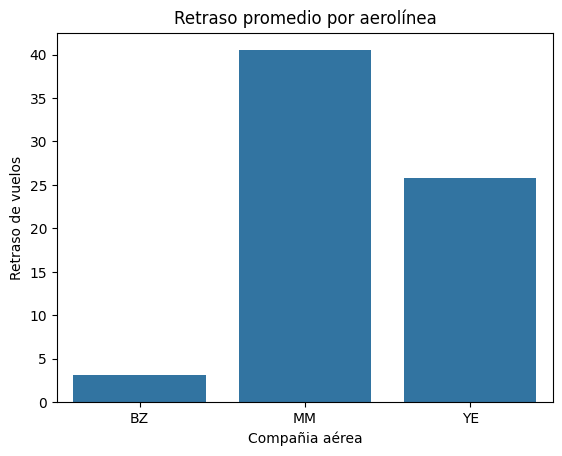

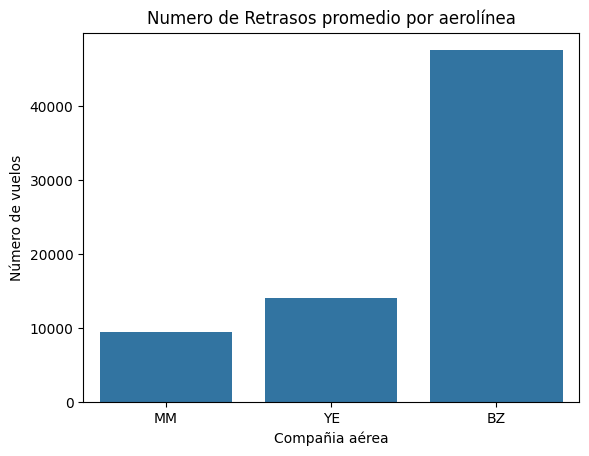

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby("airline")["delay"].mean().reset_index()
sns.barplot(x="airline", y="delay", data=avg_delay)
plt.title("Retraso promedio por aerolínea")
plt.xlabel('Compañia aérea')
plt.ylabel('Retraso de vuelos')
plt.show()

sns.countplot(x="airline", data=datos)
plt.title("Numero de Retrasos promedio por aerolínea")
plt.xlabel('Compañia aérea')
plt.ylabel('Número de vuelos')
plt.show()

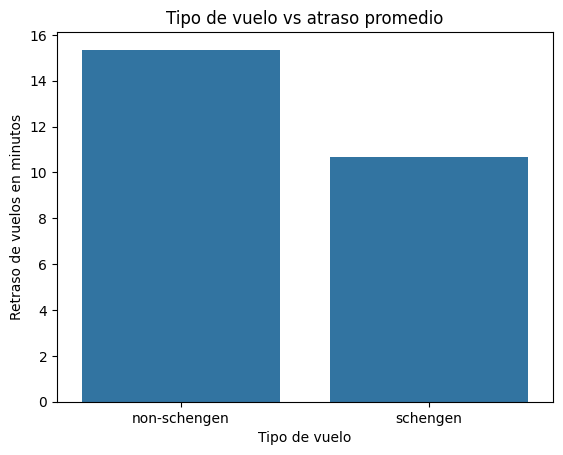

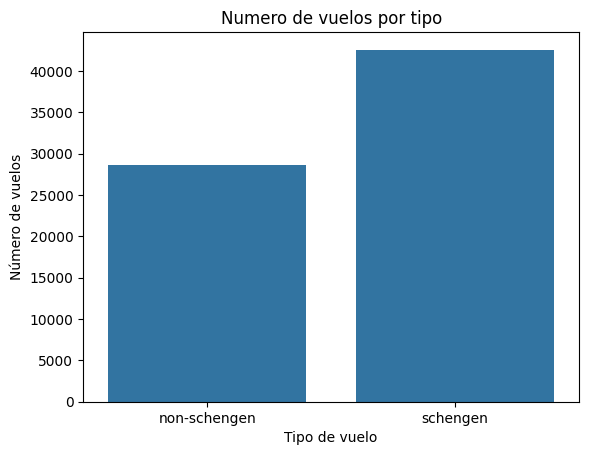

In [8]:
avg_delay = datos.groupby("schengen")["delay"].mean().reset_index()
sns.barplot(x="schengen", y="delay", data=avg_delay)
plt.title("Tipo de vuelo vs atraso promedio")
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso de vuelos en minutos')
plt.show()

sns.countplot(x="schengen", data=datos)
plt.title("Numero de vuelos por tipo")
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

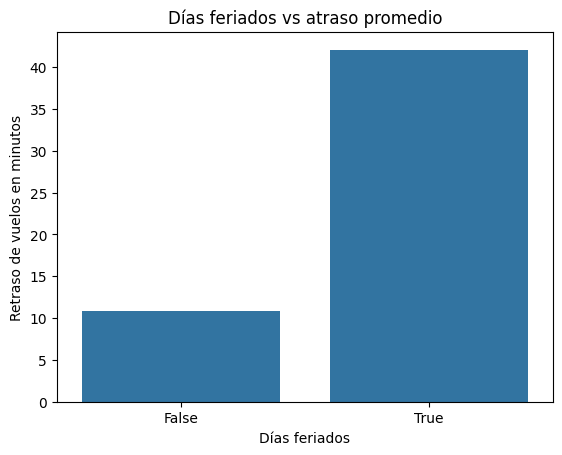

In [9]:
avg_delay = datos.groupby("is_holiday")["delay"].mean().reset_index()
sns.barplot(x="is_holiday", y="delay", data=avg_delay)
plt.title("Días feriados vs atraso promedio")
plt.xlabel('Días feriados')
plt.ylabel('Retraso de vuelos en minutos')
plt.show()

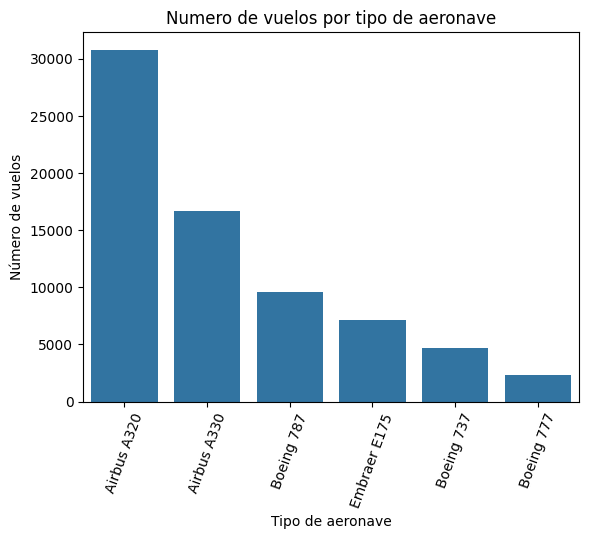

In [10]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(x="aircraft_type", data=datos, order=order)
plt.title("Numero de vuelos por tipo de aeronave")
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()